![DSB logo](img/Dolan.jpg)
# Pandas Data Structure

## PD4E Chapter 2
### How do you read/manipulate/store data in Python?

_Lecture Slides v 0.1, Developed by Dr. Jie Tao_

# What You Learned in Python/Pandas that could Apply Here

You will need following knowledge from the first half of this course:
1. containers--- ie: dictionary, tuple, set
2. function definition and calling
3. subsetting and indexing
4. Loading data in Pandas
5. Slicing and subsetting
6. Basic knowledge of DataFrame

# What You will Learn in this Chapter
You will learn following techniques in this chapter:
1. Load in manual data
2. The `Series` object
3. Basic operations on `Series`
4. The `DataFrame` object
5. Conditional subsetting and fancy slicing/indexing
6. Saving data to disk

# Creating a Series

- Manually creating data is an important skill for testing your code
    - You do not have to load data from a file, like we did last week
    - This type of testing is particularly useful when you want to find out what happened with an error
- pandas `Series` is a _one-dimensional_ container similar to a Python _list_
    - We saw `Series` as a column in a pandas `DataFrame`
    - Each `DataFrame` can be considered as a `dict` of `Series`
        - the `keys` of `dict` are the _column names_, and the `values` are `Series`

In [25]:
# Since `Series` and `list` are similar, 
# the easiest way to create a `Series` is to pass a `list`
import pandas as pd

s = pd.Series(['banana', 42])    # a series can be ananamous {name: [values]}-- do not need 'name'
s

0    banana
1        42
dtype: object

# A Few Pointers

- We passed a `list` `['banana', 42]` to a the `Series` constructor, and a `Series` object is created
    - since we passed a `list` with mixed data types (`str` and `int`), the `Series` has a data type of `object`
        - `object` is the most inclusive data type in `pandas`, however, we do not want it unless we have no other choice
    - When passing a `list`, `pandas` automatically assign row numbers (`0`, `1`) to the `Series`
    - But we can also assign row names to the `Series`

In [26]:
# Creating another `Series` with assigning index values and name of `Series`
pandas_creater_series = pd.Series(['Wes McKinney', 'Creator of Pandas'], 
                                 index=['Person', 'Who'], # index values
                                 name ='Info') # name of `Series`
pandas_creater_series    


#input is a list of strings- wes mckinney and creator of pandas- arguments 
#name is always a column??

Person         Wes McKinney
Who       Creator of Pandas
Name: Info, dtype: object

In [27]:
# you can also pass a `dict` as a `Series`-- creating a series from a dict is preffered
# keys become series index values
dict_series = pd.Series({'k1':'v1', 'k2':'v2'})
dict_series

k1    v1
k2    v2
dtype: object

# Creating a DataFrame

- As said earlier, a `DataFrame` object can be considered as a `dict` of `Series`
    - in practice, we use `dicts` as the most popular way of creating a `DataFrame`
    - but instead of using `Series`, we often use `lists`, since they are very similar

In [28]:
# creating a DF from a `dict`
scientists_df = pd.DataFrame(
    {'Name': ['Rosaline Franklin','William Gosset'],
     'Occupation':['Chemist','Statistician'],
     'Born':['1920-07-25', '1876-06-13'],
     'Died':['1958-04-16', '1937-10-16'],
     'Age':[37,61]})
scientists_df
# note that the order to columns/rows are not guaranteed

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


# If We Want Them in ORDER
- Note that the order to columns/rows are not guaranteed, since `pandas` arrange `dict keys` in the alphabetical order by default
- If we want to specific the order of columns, we should use the `columns=` argument in the `pd.DataFrame()` constructor
    - Normally we pass a `list` of `strings` to this argument

- If we also want to pass index values, similar to `Series`, we can use the `index=` argument

In [29]:
scientists_df = pd.DataFrame(
data={'Occupation':['Chemist','Statistician'],
'Born':['1920-07-25', '1876-06-13'],
'Died':['1958-04-16', '1937-10-16'],
'Age':[37,61]},
index=['Rosaline Franklin','William Gosset'],   #names are the columns
columns=['Occupation', 'Born','Died','Age'])

scientists_df   

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [30]:
# Note that not only a column, a row in a DF is also a `Series`
# we can use the row index label to slice a row
first_row = scientists_df.loc['Rosaline Franklin']   #series only have one presentation- vertical
first_row

Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: Rosaline Franklin, dtype: object

In [31]:
# we can test the type of `first_row` as `Series`
type(first_row)

pandas.core.series.Series

In [32]:
# Note that when we slice a row, 
# the column names in the orginal DF become index values of the `Series`
# similarly, since we know `Series` are similar to `dict`, we can use `.keys()` method--- not an attribute--attributes have (). 
first_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [33]:
# Series support an attribute to access its values
first_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

# A Quick Note about Methods and Attributes
- Unlike functions, methods and attributes are both associated with a certain object (`DataFrame`, `Series`)
    - we use dot notation (`.`) for both methods and attributes
- Difference between methods and attributes are:
    - Methods are some calculation or operation toward the object, you can think of them as __functions__ toward a certain type of object
    - Attributes are some properties of the object, which can are used to define an object
        - `[]` are also attributes

In [34]:
# you can get the first index of `first_row` using an attribute
first_row.index[0]

'Occupation'

# Series Methods

- `Series` objects support a group of calculations, which is inhereted from `numpy` [reference](https://docs.scipy.org/doc/numpy/user/)
    - below methods only work for numeric valued `Series` 
    - Refer to __Table 2.2__ on pp.31 in PD4E for a more comprehensive of `Series` methods 
        - __Maybe handy when you are working on your assignment__
```python
s.mean()
s.min()
s.max()
s.std()
```
    

In [35]:
# ages is a numeric valued `Series`
ages = scientists_df.Age

print('average age:', ages.mean())
print('min age', ages.min())
print('max age', ages.max())
print('age standard deviation', ages.std())

average age: 49.0
min age 37
max age 61
age standard deviation 16.97056274847714


# Boolean Subsetting of Series
- Last week, we learned how to use specific conditions to subset a DataFrame/Series
- however, more typically we do not know these specific conditions
    - rather than testing whether values meet (or don't meet) certain condition
    
    
We need a larger dataset for illustration.|

In [40]:
# please change your PATH to `'/srv/data/my_shared_data_folder/ba505-data/scientists.csv'`
more_scientists_df = pd.read_csv('/srv/data/my_shared_data_folder/ba505-data/scientists.csv')
ages = more_scientists_df.Age
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [41]:
# Get basic stats of `ages`
ages.describe()   #do not need this step

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [42]:
# we can filter values of ages by
# whether they are greater than the mean age or not
ages[ages > ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [43]:
# WHY? Let's look at what did the inner logical expression return
ages > ages.mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

In [44]:
# what's the type of above results?
type(ages > ages.mean())

pandas.core.series.Series

- Now we know that we can __filter__ `Series` values based on a boolean `Series` of the same length. 
    - only values associated with `True` values are returned
- Since we know that, we can manually create a `Series` of boolean values for filtering purposes
    - See an example on pp.32-33 for manually filtering

# Pandas Operations Automatically Broadcast
- Since we already learned __iteration__(e.g., _for loops_), we know if we want to apply an operation toward a collection of items (e.g. `lists`, `dicts`), we need to embed the operation in a loop
- However, many of `Pandas` operations that work on `Series` and/or `DataFrames` work on the entire vector (all elements) simultaneously
    - this is how `Pandas` makes calculations on large datasets very fast
    - this is referred as _broadcasting_, in which results are automatically _aligned_ and _vectorized_

In [45]:
# vector of same length
ages + ages     #adding 1 to 1, 2 to 2, 3 to 3

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [46]:
# Vectors and integers (scalar values)
ages + 100     #operation connecting collection to an actual value

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64

In [47]:
# vectors with different lengths
# Note that `NaN` means not a number
# only matched values can work, the rest of the `Series` returns as `NaN`
ages + pd.Series([1, 100])

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [48]:
# vectors with common index are automatically aligned

# create a `Series` of `ages` in _reversed order_
rev_ages = ages.sort_index(ascending=False)

rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

# Your Turn Here

Inspect the results closely, and tell me why the results is like below.

In [49]:
rev_ages + ages

#expected to have first value of ages add to first value of reversed
#we do not get this result
#this adds position 0 to position 0, positon 1 to position 1--- to get expected result, you must reverse the index as well

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [50]:
# a little help
ages * 2    #automatically broadcasts---age multiplied by 2  #check!!!

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

# DataFrames and Series are Similar

- As said before, DataFrames are essentially dictionaries of Series
    - so most of the characteristics of Series can be applied to DataFrames
    - in detail, both _boolean subsetting_ and _broadcasting_ can be applied to DFs
        - Refer to __Table 2.3__ (pp.37) for more details on DF subsetting methods

In [51]:
# boolean subsetting
more_scientists_df[more_scientists_df.Age > more_scientists_df.Age.mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [52]:
# broadcasting

more_scientists_df * 2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


# Making Changes to Series & DataFrames

- Subsetting/Slicing/Filtering data in our Series and DataFrames are very useful techniques
    - you should practice a lot of these skills since you will need them badly in BA 545
- In some other scenarios, we also need to change values in our data
    - for instance, in data mining/machine learning, we process data so our models can take them
- Three types of changes are popular
    1. adding additional columns - transfer values in the orginal column in a new column
    2. Directly changing a column - most direct, but not recommended at most times
    3. Dropping a column - maybe useful, but not recommended at most times

## 1. Adding Additional Columns
- Usually, we create a new column to store the processed values from an original column
    - Benefits of this include:
        - we keep the original column so we can compare the original values and the processed values
        - if the processed values are not as expected, we can always start over
        - __re-traceability/re-producibility__: in any analysis, other people should be able to replicate your results from the original data, following your documented steps
- Consider following example:

In [53]:
# types of `born` and `died` are `object` which means they are `strings`
print(more_scientists_df.Born.dtype)
print(more_scientists_df.Died.dtype)  #want them to be dates, but they are in strings

object
object


In [54]:
# format `born` as a datetime
# Pandas provides a function/method `.to_datetime()` for that
# you need to specify the format of your date/time
# refer to the method docs for more details: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

born_datetime = pd.to_datetime(more_scientists_df['Born'], format='%Y-%m-%d')
born_datetime.head()  #converting to date-- just need to give pandas the format 

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
Name: Born, dtype: datetime64[ns]

In [55]:
# Similar operation to `Died`
died_datetime = pd.to_datetime(more_scientists_df['Died'], format='%Y-%m-%d')
died_datetime.head()

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
Name: Died, dtype: datetime64[ns]

In [56]:
# insert these new columns (`born_datetime`, `died_datetime`) back to the DF
# we use a __multi-assignment__ statement here - refer to appendix Q in PD4E for more details
more_scientists_df['born_dt'], more_scientists_df['died_dt'] = (born_datetime, died_datetime)

# now let's test if the converted column and the original column are aligned
# use `Born` as an example
more_scientists_df[['Born', 'born_dt']].head()

,Born,born_dt
0,1920-07-25,1920-07-25
1,1876-06-13,1876-06-13
2,1820-05-12,1820-05-12
3,1867-11-07,1867-11-07
4,1907-05-27,1907-05-27


In [57]:
# we can also test if the new columns are successfully inserted
# there are multiple ways
# in the text book (pp.39), the method use `.shape` attribute
# we use column names to test if the two new columns appear
more_scientists_df.columns

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt'], dtype='object')

## 2. Directly Change a Column
- Even though we do not recommend this approach, sometimes this is very useful
    - particularly when we created a copy of the data, then we can change the values directly without changing the origial data
    - no matter under what circumstances, changing the original data is __FORBIDDEN__.
- We can assign new values to a DataFrame (in a column particularly)
    - You may receive a warning from Pandas trying to stop you from changing the original data
- More complicated examples are provided in Chapter 9
- Read PD4E pp.40-42 for more examples

In [58]:
# Create a copy of 'more_scientist_df'
# a MUST-DO when you want to change the values directly
more_scientists_df_copy = more_scientists_df.copy()

# let shuffle the values of `Age`
import random
# set a seed so the randomness is always the same
# we will see different uses of this multiple times
random.seed(2019)
random.shuffle(more_scientists_df_copy.Age)

/opt/tljh/user/lib/python3.6/random.py:277: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [59]:
more_scientists_df_copy.Age

0    56
1    77
2    37
3    45
4    66
5    61
6    41
7    90
Name: Age, dtype: int64

In [60]:
# Compare with original
more_scientists_df.Age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

## 3. Dropping Values

- Dropping a column is not recommended
- To drop a column, we can either:
    - Select the columns we want to keep, and store in a new DataFrame
    - Select column to drop using the `.drop()` method

In [61]:
more_scientists_df_copy.drop(['Age'], inplace=True, axis=1)
# Age column is dropped
more_scientists_df_copy.head()

,Name,Born,Died,Occupation,born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14


# Importing and Exporting Data

- Comma Separated Values (csv) are the _most flexible_ data storage type.
    - for each row, the column values are separated by a comma (`,`), or a tab (which makes it a TSV file)
    - this is the preferred way of sharing data and collaboration
    - Pandas provides a `.to_csv()` method for storing DataFrame/Series in CSV/TSV
    - refer to the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) for more information

In [62]:
import os
dirName = 'data'
 
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName,  " Created ") 
except FileExistsError:
    print("Directory " , dirName,  " already exists")

Directory  data  Created 


In [63]:
more_scientists_df_copy.to_csv('./data/more_scientists.csv')

# Importing and Exporting Data - Cont'd

- Python has a way to _pickle_ data
- _Pickle_ is Python's way of serializing and saving data in a binary format
- Different from `.to_csv()`, pickle preservses data type in your data
    - for instance, if you save a list in a DataFrame to CSV, the list is converted to a string `'[', 'element1', ..., ']'`
    - where as pickle can save lists and dicts as themselves
    
    - refer to the pickle [docs](https://docs.python.org/3/library/pickle.html) here
    - similarly, there is a file type called JSON ([docs](https://docs.python.org/3/library/json.html)) that is suitable for saving dicts and DataFrames

In [64]:
# write to pickle
# note that the file is named as `.pickle`
more_scientists_df_copy.born_dt.to_pickle('./data/scientist_born_dates.pickle')

In [65]:
# Read from pickle
# note that the datetime date type is preserved
born_dates = pd.read_pickle('./data/scientist_born_dates.pickle')
born_dates

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: born_dt, dtype: datetime64[ns]

# Your Turn Here

Finish exercises below by following instructions of each of them.

## Q1. Coding Completion Problem

Given a random `Series` of integers, find elements that are divisible by 3.

In [2]:
# this code block generates a `Series` of 20 integers between 1 and 19
import pandas as pd

import numpy as np
my_series = pd.Series(np.random.randint(1, 20, 20))
my_series

0      9
1      3
2      8
3      7
4     19
5      6
6      7
7     16
8     14
9     14
10    18
11     3
12     1
13     4
14     1
15    17
16    17
17    14
18     1
19     9
dtype: int64

In [7]:
# write your code here to find numbers in `my_series` 
# that are divisible by 3
# hint: you just need one line of code

my_series[my_series % 3 == 0]

#ages[ages > ages.mean()] used function from above as basis

0      9
1      3
5      6
10    18
11     3
19     9
dtype: int64

In [9]:
#extra points
#replace all numbers not divisible by 3 with 'NaN'
#hint: just need one more line of code

# my_series[my_series % 3 == 0]
#my_series + pd.Series([my_series % 3 == 0])

((my_series[my_series % 3 == 0] + my_series)/2)  #only certain values of 0-19 are dividible by 3-- shown in code block above
                                                #begin with code shown above and add my_series in order to return the full list of 0-19, instead of what was only divisible by 3
                                                #adding my_series to irignal code will replace nondivisible numbers with the NaN
                                                #must divide by two in order to return original values (ie: 9+9=18---must divide by 2 in order to return to original value of 9)
                                                #values in list 0-19 that were not divisible by 3 will be subsituted with NaN

0      9.0
1      3.0
2      NaN
3      NaN
4      NaN
5      6.0
6      NaN
7      NaN
8      NaN
9      NaN
10    18.0
11     3.0
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     9.0
dtype: float64

## Q2. Coding Completion Problem

Given a DataFrame with two columns of random dates (`date1`, `date2`), calculate `months` between the two dates in each row in the third column (`year_diff`). Then save the DataFrame as a pickle file (`./data/dates_calc.pickle`).

In [69]:
import pandas as pd
import random 

# function to generate random dates
def rng_dates(n,start_date, end_date):
    # hat tip to Peilonrayz
    date_lst = []
    for i in range(n):
        date_lst.append(pd.to_datetime(random.choice(pd.bdate_range(start_date, end_date))))
    return date_lst
        
date_series1 = pd.Series(rng_dates(10, '2016-01-01', '2017-12-31')).sort_values().reset_index(drop=True)
date_series2 = pd.Series(rng_dates(10, '2018-01-01', '2019-12-31')).sort_values().reset_index(drop=True)
date_df = pd.concat([date_series1, date_series2], axis=1)
date_df.columns = ['date1', 'date2']
date_df

,date1,date2
0,2016-02-16,2018-05-31
1,2016-04-13,2018-06-05
2,2016-12-09,2018-08-13
3,2017-02-23,2018-10-18
4,2017-03-30,2019-01-23
5,2017-04-05,2019-02-20
6,2017-06-16,2019-04-30
7,2017-08-16,2019-06-19
8,2017-08-24,2019-09-25
9,2017-10-19,2019-11-25


In [85]:
# Calculate `months` between `date1` and `date2`
# refer to the example on pp.41-42 for help
# write your code below
# Test if your results are correct
year_diff_days = pd.Series(rng_dates(10, '2018-01-01', '2019-12-31')).sort_values().reset_index(drop=True)
year_diff_days = (date_df['date2'] - date_df['date1'])
year_diff_days 

# answer automatically is in days-- needs to change to months

0   835 days
1   783 days
2   612 days
3   602 days
4   664 days
5   686 days
6   683 days
7   672 days
8   762 days
9   767 days
dtype: timedelta64[ns]

In [84]:
year_diff = year_diff_days.astype('timedelta64[M]') #use astype method to chnge days to months-- see text pg 42
year_diff

0    27.0
1    25.0
2    20.0
3    19.0
4    21.0
5    22.0
6    22.0
7    22.0
8    25.0
9    25.0
dtype: float64

In [86]:
date_df = pd.concat([date_series1, date_series2, year_diff], axis=1)
date_df.columns = ['date1', 'date2', 'year_diff']
date_df

,date1,date2,year_diff
0,2016-02-16,2018-05-31,27.0
1,2016-04-13,2018-06-05,25.0
2,2016-12-09,2018-08-13,20.0
3,2017-02-23,2018-10-18,19.0
4,2017-03-30,2019-01-23,21.0
5,2017-04-05,2019-02-20,22.0
6,2017-06-16,2019-04-30,22.0
7,2017-08-16,2019-06-19,22.0
8,2017-08-24,2019-09-25,25.0
9,2017-10-19,2019-11-25,25.0


In [87]:
# Save the updated `date_df` as a pickle file in the './data' folder
import os
dirName = './data'
 
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName,  " Created ") 
except FileExistsError:
    print("Directory " , dirName,  " already exists")


Directory  ./data  already exists


In [91]:
date_df.to_csv('./data/date_df.csv')  # newly updates date_df was saved in pickle file

![DSB logo](img/Dolan.jpg)
# Pandas Data Structure

## PD4E Chapter 2
### How do you read/manipulate/store data in Python?

![DSB logo](img/Dolan.jpg)
# Pandas Basic Plotting

## PD4E Chapter 3: Introduction to Plotting
### How do you read/manipulate/store data in Python?

# What You Learned in Python/Pandas that could Apply Here

You will need following knowledge from the first half of this course:
1. containers
2. using functions
3. subsetting and indexing
4. classes

# What You will Learn in this Chapter
You will learn following techniques in this chapter:
1. `matplotlib`
2. `seaborn`
3. `Pandas` plotting

# Python's Plotting Package: Matplotlib

- `matplotlib` is Python's fundamental plotting package
    - users have flexible control over elements in plots
    - most of the plotting functions are in a sub package called `matplotlib.pyplot`
        - we just need to the subpackage, mostly

In [42]:
# below are standardized way of setting the ground for any plotting
# import package
import matplotlib.pyplot as plt
# config the plotting tool
# below command makes sure plots appear in a Jupyter notebook instead of creating a new notebook
%matplotlib inline
# set the style for plotting
# `ggplot` is the most pupolar plotting tool inhereted from R
plt.style.use('ggplot')

In [43]:
# `seaborn` is another plotting package
# here we use it to load the data
import seaborn as sns

# load data
anscombe = sns.load_dataset('anscombe')
dataset_1 = anscombe[anscombe['dataset'] == 'I']

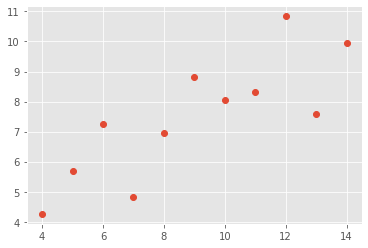

In [44]:
# the three arguments are x variable, y variable, 
# and 'o' indicates drawing circles in the scatterplot
plt.plot(dataset_1['x'], dataset_1['y'], 'o')  #the 'o' makes the dots----other option is using 'x' for x's

# Your Turn Here

The `anscombe` dataset contains _4_ sub-datasets. Create a visualization containing all _4_ sub-datasets like below.
![exercise1](img/PD4E-Ch3-Fig1.png)

See tge text book pp. 52 - 55 for more help.

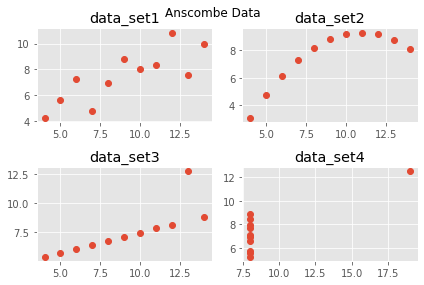

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure()
#creates a single figure where all 4 plots will go

axes1 = fig.add_subplot(2,2,1)  #subplot has 2 rows and 2 columns-locsted in plot location 1
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)
#must create axes for all four plots

dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')  #adds a plot to the axes created by the above--'o' marks that plots will be circles
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')


axes1.set_title('data_set1')   #titles cam be added to each subplot for description purposes
axes2.set_title('data_set2')
axes3.set_title('data_set3')
axes4.set_title('data_set4')

fig.suptitle('Anscombe Data')  #create title to describe entire 4 figures

fig.tight_layout()  #use tight layout so all titles can be seen--helps graphs not be so squished together

# Anatomy of a Figure

Observe below figure for the terminology of a figure.

![example1](img/PD4E-Ch3-Fig2.png)

# Statistical Visualizations Using Matplotlib

Below are different types of visualizations used in analytics:
- Univariate
    - Histograms
- Bivariate
    - Scatterplot
    - Boxplot
- Multivariate (refer to pp. 59 - 61 for an example)

In [56]:
# load a new dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Histogram of Total Bills')

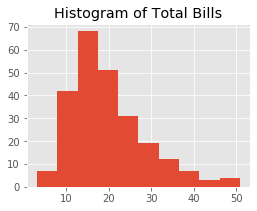

In [47]:
# histogram
fig = plt.figure(figsize=(4,3)) # note that we specify the size the figure
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips.total_bill, bins=10) # specify 10 bins in the histogram
axes1.set_title('Histogram of Total Bills')

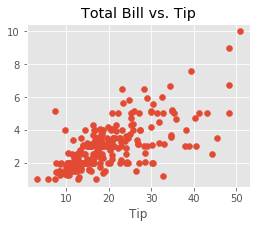

In [48]:
# bivariate means two variables
# most popular bivariate visualization is scatterplot
# use with two continuous variables
scatter_plot = plt.figure(figsize=(4, 3))
axes2 = scatter_plot.add_subplot(1,1,1)
axes2.scatter(tips.total_bill, tips.tip)
axes2.set_title('Total Bill vs. Tip')
# below statements show you how to set names for x- and y-axis
axes2.set_xlabel('Total Bill')
axes2.set_xlabel('Tip')
# below code show how to show a figure
scatter_plot.show()

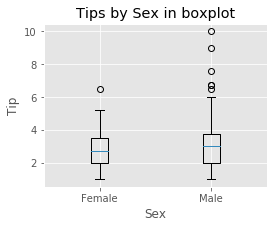

In [49]:
# Boxplot is an important visualization to show-- shows outliers 
# the relationship between a discrete variable
# and a continuous variable
box_plot = plt.figure(figsize=(4,3))
ax1 = box_plot.add_subplot(1,1,1)
ax1.boxplot(
    # first argument is the data
    # since we are plotting over two pieces of data
    # we have to put each piece of data into a list
    [tips[tips.sex == 'Female']['tip'],
     tips[tips.sex == 'Male']['tip']],
    # we can pass in optional parameter to label the data
    labels = ['Female', 'Male'])
ax1.set_xlabel('Sex')
ax1.set_ylabel('Tip')
ax1.set_title('Tips by Sex in boxplot')
box_plot.show()

# Plotting using Seaborn
- `Seaborn` is an add-on package building on `matplotlib`
    - it is a high-level interface for statistical visualization
- `Seaborn` is closely tied with SciPy/PyData (`numpy, scipy, pandas`)
- `Seaborn` provides ablity to fine-tune your visuals
- we only show a few of `seaborn` examples, for more examples, refer to pp. 63 - 83

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

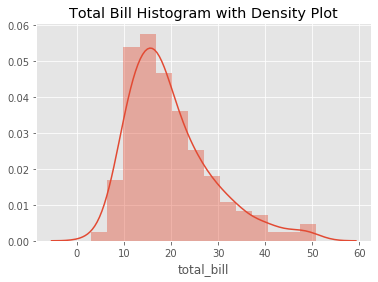

In [50]:
# below statement is a shortcut for creating the figure object
# and add the individual subplot(`ax1`) to the figure
hist, ax = plt.subplots()

# instead of the `hist()` function from `matplotlib`
# we use 'displot()' from `seaborn` - stands for distribution plot
ax = sns.distplot(tips.total_bill)
ax.set_title('Total Bill Histogram with Density Plot')

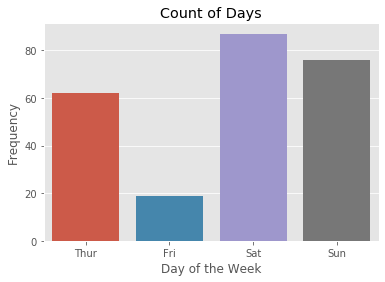

In [51]:
# bar plot is another visualization type we use for investigating the distribution of data
count, ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

plt.show()

# Pandas Plotting

`Pandas` provides a few of built-in plotting methods, which are built on `Matplotlib` as well.


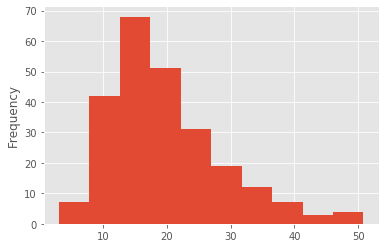

In [52]:
# histogram
tips.total_bill.plot.hist()

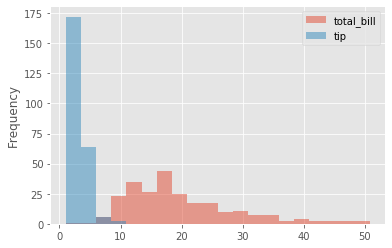

In [53]:
# overlay two variables in a histogram
tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20)

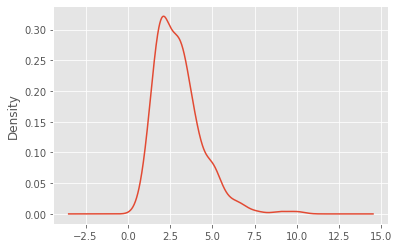

In [54]:
# density plot
tips.tip.plot.kde()

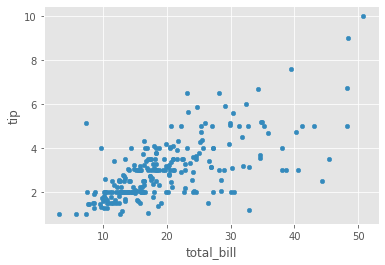

In [55]:
# Scatter Plot
tips.plot.scatter(x='total_bill', y='tip')

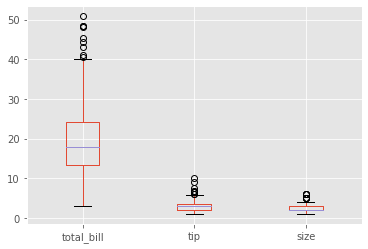

In [56]:
# box plot
tips.plot.box()

# Your Turn Here
Finish exercises below by following instructions of each of them.

# Q1. Coding Problem

Using the `tips` dataset, create different visualizations (at least 5 total, with 3 not covered in the lecture). 

Try to explain what __insights__ you can read off the visualizations.

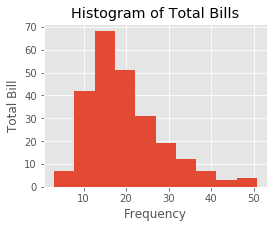

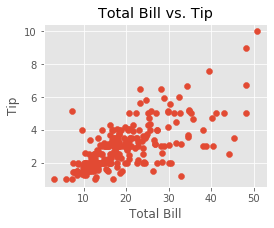

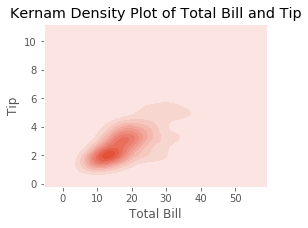

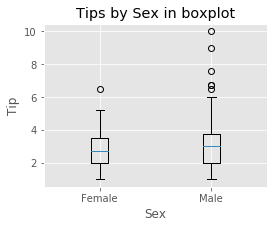

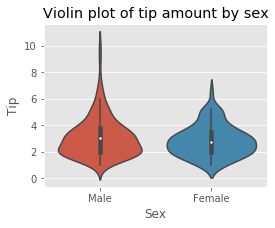

In [91]:
# histogram- there are many more bills with a lower total than a higher total. 
fig = plt.figure(figsize=(4,3)) # note that we specify the size the figure
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips.total_bill, bins=10) # specify 10 bins in the histogram
axes1.set_title('Histogram of Total Bills')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

#scatterplot-- positive trend-- as total bill increases, the tip tends to increase
#most bills and tips are low amounts
scatter_plot = plt.figure(figsize=(4, 3))
axes2 = scatter_plot.add_subplot(1,1,1)
axes2.scatter(tips.total_bill, tips.tip)
axes2.set_title('Total Bill vs. Tip')
# below statements show you how to set names for x- and y-axis
axes2.set_xlabel('Total Bill')
axes2.set_ylabel('Tip')
# below code show how to show a figure
scatter_plot.show()

#Bivariate plot--similar idea to scatter plot in that the most dense region is darker then the less dense region of plots
#still shows positive trend, but same results that most tips and bill amounts are of low value
bivariate = plt.figure(figsize=(4, 3))
ax = sns.kdeplot(data=tips['total_bill'],data2=tips['tip'], shade=True)
ax.set_title('Kernam Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
bivariate.show

# Boxplot-- minimum tip for male and female are the same--males tip higher than females and have more instances of larger tips that do not fall within the mean
box_plot = plt.figure(figsize=(4,3))
ax1 = box_plot.add_subplot(1,1,1)
ax1.boxplot(
    # we have to put each piece of data into a list- two pieces of data
    [tips[tips.sex == 'Female']['tip'],
     tips[tips.sex == 'Male']['tip']],
    # we can pass in optional parameter to label the data
    labels = ['Female', 'Male'])
ax1.set_xlabel('Sex')
ax1.set_ylabel('Tip')
ax1.set_title('Tips by Sex in boxplot')
box_plot.show()

#violin plot--similar idea to a box plot, but easier to show the density of the median tip information
#median tip is generally the same for males and females, but males will top higher
#most tips for males and females fall within the median range--hard to see in the box plot
violin_plot = plt.figure(figsize=(4,3))
ax = sns.violinplot(x='sex', y='tip', data=tips)
ax.set_title('Violin plot of tip amount by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Tip')
violin_plot.show()


# Classwork (start here in class)
You can start working on them right now:
- Read Chapter 2 & 3 in PD4E 
    - in particular Section 3.6 - since we did not cover it in class 
- If time permits, start in on your homework. 
- Ask questions when you need help. Use this time to get help from the professor!

# Homework (do at home)
The following is due before class next week:
  - Any remaining classwork from tonight
  - DataCamp “Grouping Data” assignment

Note: All work on DataCamp is logged. Don't try to fake it!

Please email [me](mailto:jtao@fairfield.edu) if you have any problems or questions.

![DSB logo](img/Dolan.jpg)
# Pandas Basic Plotting

## PD4E Chapter 3: Introduction to Plotting
### How do you read/manipulate/store data in Python?

this can all be done with pandas